# Einstein Tensor calculations using Symbolic module

In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor

sympy.init_printing()

### Defining our time dependent metric as from equation 31
https://docs.einsteinpy.org/en/latest/examples/Symbolically%20Understanding%20Christoffel%20Symbol%20and%20Riemann%20Curvature%20Tensor%20using%20EinsteinPy.html

Kasner eqn 31
10.1139/cjp-2017-1001

In [2]:
syms = sympy.symbols("t r theta phi")
G, M, c, a, w = sympy.symbols("G M c a w")
a = 2*M*((sin(w*syms[0]))**2)
print(a)
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -(1 - (a / syms[1]))* (c ** 2)
list2d[1][1] = 1 / (1 - (a / syms[1])) 
list2d[2][2] = 1 * (syms[1] ** 2) 
list2d[3][3] = 1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


2*M*sin(t*w)**2


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

⎡   ⎛       2         ⎞                                     ⎤
⎢ 2 ⎜2⋅M⋅sin (t⋅w)    ⎟                                     ⎥
⎢c ⋅⎜───────────── - 1⎟           0           0       0     ⎥
⎢   ⎝      r          ⎠                                     ⎥
⎢                                                           ⎥
⎢                                 1                         ⎥
⎢          0             ───────────────────  0       0     ⎥
⎢                                 2                         ⎥
⎢                          2⋅M⋅sin (t⋅w)                    ⎥
⎢                        - ───────────── + 1                ⎥
⎢                                r                          ⎥
⎢                                                           ⎥
⎢                                              2            ⎥
⎢          0                      0           r       0     ⎥
⎢                                                           ⎥
⎢                                                  2    2   ⎥
⎣       

### Calculating the Einstein Tensor (with both indices covariant)

In [3]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡                             2⋅M⋅w⋅sin(2⋅t⋅w)                                
⎢           0             ───────────────────────                             
⎢                           ⎛         2         ⎞                             
⎢                         r⋅⎝- 2⋅M⋅sin (t⋅w) + r⎠                             
⎢                                                                             
⎢    2⋅M⋅w⋅sin(2⋅t⋅w)                                                         
⎢───────────────────────             0                                        
⎢  ⎛         2         ⎞                                                      
⎢r⋅⎝- 2⋅M⋅sin (t⋅w) + r⎠                                                      
⎢                                                                             
⎢                                                          3  2 ⎛       4     
⎢                                                  -2.0⋅M⋅r ⋅w ⋅⎝4⋅M⋅sin (t⋅w)
⎢           0                        0             ─

In [4]:
# what is the Weyl tensor?
#weyl = WeylTensor.from_metric(sch)
#weyl.tensor() # all components!

(t, r, theta, phi, M, c, w)


Text(0.5, 1.0, 'T_01')

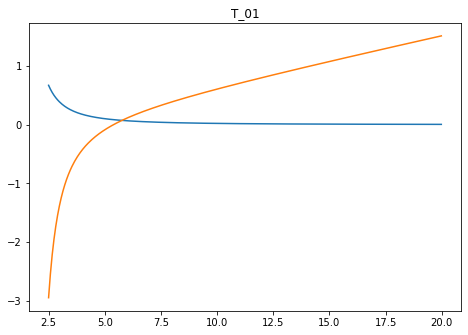

In [5]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(2.5, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1, 1)[0][1]

# Call the functions
y = func(1.0,x,1, 1, 1, 1, 1)[0][1]
z = 0.1*func(1.0,x,1, 1, 1, 1, 1)[2][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


